# Project Goal

## Business Object
* To gather tweets about movie pet sematary using Twitter API stream.classify them as positive/negative tweets.
* Analyse which place and which device tweet the most.

## Technical Object
* Before analyse the tweets, built a predicting model first.
* Use the fitted model to predict the polarity of the tweets.


# Run the built_model.py file

accuracy score: 65.70%
Classification Report

              precision    recall  f1-score   support

           0       0.70      0.73      0.71       590
           1       0.59      0.55      0.57       410

   micro avg       0.66      0.66      0.66      1000
   macro avg       0.64      0.64      0.64      1000
weighted avg       0.65      0.66      0.66      1000



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.782


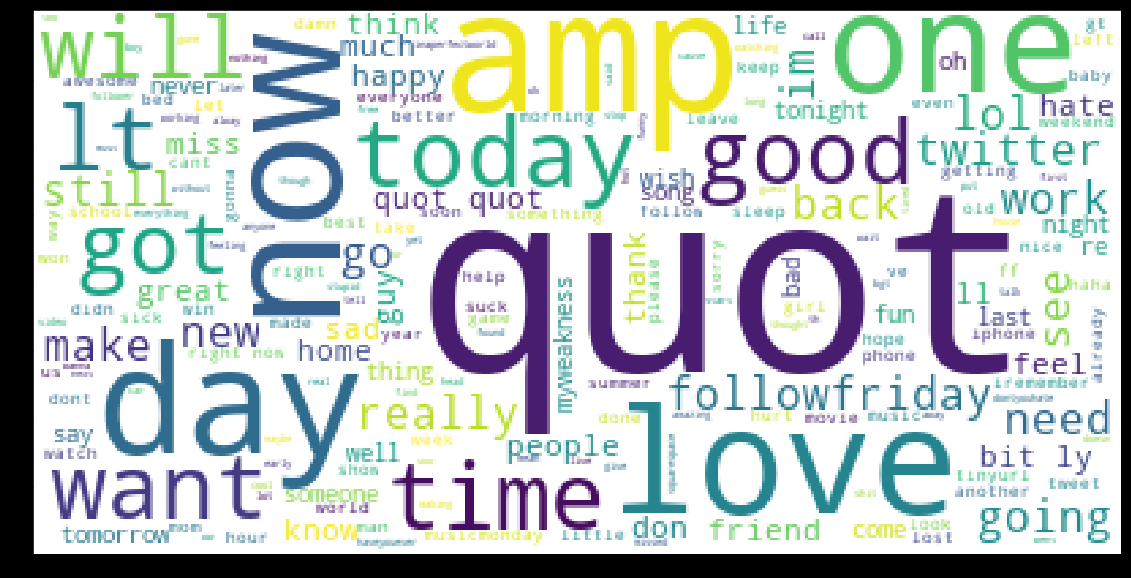

In [160]:
%run built_model.py

In [162]:
print(accuracy1,accuracy2,accuracy3,accuracy4)

0.761 0.753 0.782 0.765


In [164]:
print(clf3)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        ...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'vect__ngram_range': [(1, 1), (1, 2), (2, 2)], 'tfidf__use_idf': (True, False), 'tfidf__norm': ('l1', 'l2'), 'clf__penalty': ['l1', 'l2'], 'clf__C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=0)


# Collect tweets and save into a json file

In [ ]:
import tweepy as tw
import pandas as pd

import jsonpickle
from tweepy.streaming import StreamListener

import json

consumer_key = 'slLY7RMLkLnsJt1KyzRxL7aKN'
consumer_secret = 'vgvOFOrz3YIdJdym5ZIqUMPKKbieTvWHrQkZxF48G9ntHCIojs'
access_token = '1019824701760155648-1xRNjE665Y7yu4jzBCClSx2xZelkyw'
access_secret = 'Tf0CDiT4Ys4Q9F82opVqNyfUs2bnMsurch4GrHy0KvNk2'

auth = tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

class MyListener(StreamListener):
 
    def on_data(self, data):
        try:
            with open('Pet Sematary.json', 'a') as f:
                f.write(data)
                return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True
 
    def on_error(self, status):
        print(status)
        return True

twitter_stream = tw.Stream(auth, MyListener())

twitter_stream=twitter_stream.filter(track =['Pet Sematary'],is_async=False)

# Load tweets from json file to dataframe

## Load all the tweets into one dataframe 

In [67]:
import json
import numpy as np
import matplotlib.pyplot as plt
with open('Pet Sematary.json','r',newline='\r\n') as f:
    tweets = []
    for line in f:
        tweet = json.loads(line)
        tweets.append(tweet)

tweets[0]

{'created_at': 'Fri Apr 12 20:04:46 +0000 2019',
 'id': 1116794308537884673,
 'id_str': '1116794308537884673',
 'text': 'Pet Sematary was better than expected, plenty of scares and gore, shut my eyes a few times, a few twists on the original 😊',
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 3621727455,
  'id_str': '3621727455',
  'name': 'jules',
  'screen_name': 'julesem5',
  'location': 'England',
  'url': None,
  'description': 'Loves The Killers, Superfruit, Pentatonix - all good music 🎶',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 146,
  'friends_count': 180,
  'listed_count': 2,
  'favourites_count': 11770,
  'statuses_count': 9688,
  'created_at': 'Fri Sep 11 15:47:16 +0000 2015

In [176]:
with open('Pet Sematary.json','r',newline='\r\n') as f:
    data = json.loads(f)

TypeError: the JSON object must be str, bytes or bytearray, not TextIOWrapper

In [68]:
df1 = pd.DataFrame(tweets)

df1.shape

(200, 36)

In [69]:
df1.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,quoted_status_permalink,reply_count,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user
0,None,None,Fri Apr 12 20:04:46 +0000 2019,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,NaN,0,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...","Pet Sematary was better than expected, plenty ...",1555099486847,False,"{'id': 3621727455, 'id_str': '3621727455', 'na..."
1,None,None,Fri Apr 12 20:04:52 +0000 2019,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,NaN,0,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Going to see the new Pet Sematary tonight. Deb...,1555099492952,False,"{'id': 100679011, 'id_str': '100679011', 'name..."
2,None,None,Fri Apr 12 20:05:50 +0000 2019,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,NaN,0,0,False,{'created_at': 'Thu Apr 11 02:34:47 +0000 2019...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @YaOnlyLivvOnce: Pet Sematary 👀👀👀,1555099550166,False,"{'id': 1015022058722545664, 'id_str': '1015022..."
3,None,None,Fri Apr 12 20:07:01 +0000 2019,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,NaN,0,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",who seen pet sematary?,1555099621138,False,"{'id': 4848084281, 'id_str': '4848084281', 'na..."
4,None,None,Fri Apr 12 20:07:03 +0000 2019,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,NaN,0,0,False,{'created_at': 'Fri Apr 12 15:10:29 +0000 2019...,"<a href=""http://twitter.com/download/android"" ...",RT @starryguys: Have you seen the new PET SEMA...,1555099623833,False,"{'id': 2365351658, 'id_str': '2365351658', 'na..."


In [70]:
df1.place[28]['bounding_box']

{'type': 'Polygon',
 'coordinates': [[[-2.775262, 53.74809],
   [-2.775262, 53.800092],
   [-2.628013, 53.800092],
   [-2.628013, 53.74809]]]}

You can make your own here: https://boundingbox.klokantech.com. Be sure to specify CSV RAW to get the values in this format.

In [71]:
df1.user[:10]

0    {'id': 3621727455, 'id_str': '3621727455', 'na...
1    {'id': 100679011, 'id_str': '100679011', 'name...
2    {'id': 1015022058722545664, 'id_str': '1015022...
3    {'id': 4848084281, 'id_str': '4848084281', 'na...
4    {'id': 2365351658, 'id_str': '2365351658', 'na...
5    {'id': 3621727455, 'id_str': '3621727455', 'na...
6    {'id': 18149800, 'id_str': '18149800', 'name':...
7    {'id': 2365351658, 'id_str': '2365351658', 'na...
8    {'id': 965484707931738118, 'id_str': '96548470...
9    {'id': 24283520, 'id_str': '24283520', 'name':...
Name: user, dtype: object

In [83]:
df1.user[1]['id']

100679011

In [72]:
df1.place[:10]

0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
8    None
9    None
Name: place, dtype: object

In [73]:
df1.source[:10]

0    <a href="http://twitter.com/download/android" ...
1    <a href="http://twitter.com" rel="nofollow">Tw...
2    <a href="https://mobile.twitter.com" rel="nofo...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/android" ...
5    <a href="http://twitter.com/download/android" ...
6    <a href="http://twitter.com/download/android" ...
7    <a href="http://twitter.com/download/android" ...
8    <a href="http://twitter.com/download/iphone" r...
9    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [74]:
df1.source[8]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [85]:
df2 = df1[['text','source']]

df2.shape

(200, 2)

In [76]:
df1.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'extended_tweet', 'favorite_count',
       'favorited', 'filter_level', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'quote_count', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'reply_count', 'retweet_count', 'retweeted', 'retweeted_status',
       'source', 'text', 'timestamp_ms', 'truncated', 'user'],
      dtype='object')

## Create a seperate DataFrame of user key

In [86]:
with open('Pet Sematary.json','r',newline='\r\n') as f:
    user = []
    for line in f:
        tweet = json.loads(line)
        user.append(tweet['user'])

df3 = pd.DataFrame(user)

df3.head()

,contributors_enabled,created_at,default_profile,default_profile_image,description,favourites_count,follow_request_sent,followers_count,following,friends_count,...,profile_text_color,profile_use_background_image,protected,screen_name,statuses_count,time_zone,translator_type,url,utc_offset,verified
0,False,Fri Sep 11 15:47:16 +0000 2015,False,False,"Loves The Killers, Superfruit, Pentatonix - al...",11770,None,146,None,180,...,000000,False,False,julesem5,9688,None,none,None,None,False
1,False,Thu Dec 31 04:26:13 +0000 2009,False,False,"Plant grower, nature lover, DIYer, tea drinker...",6366,None,48,None,193,...,000000,False,False,MandorJane,656,None,none,None,None,False
2,False,Thu Jul 05 23:58:11 +0000 2018,True,False,Amor eterno al Wrestling🤘,46187,None,1049,None,5444,...,333333,True,False,cristia00115438,43665,None,none,None,None,False
3,False,Tue Jan 26 03:44:39 +0000 2016,True,False,snapchat: theyloveeejayy,12379,None,767,None,229,...,333333,True,False,theyloveeejayy,4397,None,none,None,None,False
4,False,Fri Feb 28 09:31:52 +0000 2014,True,False,None,54,None,3,None,66,...,333333,True,False,MoreMakrand,15,None,none,None,None,False


## Create a sepereate Dataframe of place key

In [87]:
with open('Pet Sematary.json','r',newline='\r\n') as f:
    place = []
    for line in f:
        tweet = json.loads(line)
        place.append(tweet['place'])

df4= pd.DataFrame(place)

df4[df4[0].isnull()==False]

,0
28,"{'id': '232d6454d6094e9b', 'url': 'https://api..."
94,"{'id': '00173cd41f2b16d3', 'url': 'https://api..."
121,"{'id': '00173cd41f2b16d3', 'url': 'https://api..."
135,"{'id': '3b77caf94bfc81fe', 'url': 'https://api..."
171,"{'id': '018929347840059e', 'url': 'https://api..."


In [88]:
#def bounding_box(place):
#    if place != None:
#        bounding_box = place['bounding_box']['coordinates']
#    else:
#        bounding_box = None
#    return bounding_box
##        
#with open('Antelope Valley.json','r',newline='\r\n') as f:
#    place = []
#    for line in f:
#        if line != None:
#            tweet = json.loads(line)
#            place.append(tweet['place']['bounding_box'])

#def find_centroid(row):
#    '''
#    Helper function to return the centroid of a polygonal bounding box of longitude, latitude coordinates
#    '''
#    #d=pd.DataFrame(np.array(a[0]))
#    row1 = pd.DataFrame(np.array(row[0]))
#    try:
#        longitude = [row1[0]]
#        latitude = [row1[1]]
#        return (sum(latitude) / float(len(latitude)), sum(longitude) / float(len(longitude)))
#    except:
#        return None
#        
## Create a new column called 'centroid' 
#df4['centroid'] = df4['bounding_box'].apply(find_centroid)

df4 = df3[['id','location','time_zone']]

df4.shape

(200, 3)

## Extract useful information and create new dataframe

In [137]:
df_=pd.DataFrame()

df_['text']=df2['text']

df_['source']=df2['source']
df_['id'] = df4['id']
df_['location']=df4['location']
df_['time_zone']=df4['time_zone']

df_.shape

(200, 5)

In [138]:
df_.columns

Index(['text', 'source', 'id', 'location', 'time_zone'], dtype='object')

In [139]:
df_.location[:10]

0           England
1              None
2    Estados Unidos
3        trap house
4     Mumbai, India
5           England
6                NC
7     Mumbai, India
8              None
9           Nor Cal
Name: location, dtype: object

# Data cleaning & exploration

## Clean the tweets text

In [140]:
df_['processed_text']=df_['text'].apply(preprocess_text)

df_.head()

,text,source,id,location,time_zone,processed_text
0,"Pet Sematary was better than expected, plenty ...","<a href=""http://twitter.com/download/android"" ...",3621727455,England,None,pet sematary was better than expected plenty o...
1,Going to see the new Pet Sematary tonight. Deb...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",100679011,None,None,going to see the new pet sematary tonight deba...
2,RT @YaOnlyLivvOnce: Pet Sematary 👀👀👀,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1015022058722545664,Estados Unidos,None,rt pet sematary
3,who seen pet sematary?,"<a href=""http://twitter.com/download/iphone"" r...",4848084281,trap house,None,who seen pet sematary
4,RT @starryguys: Have you seen the new PET SEMA...,"<a href=""http://twitter.com/download/android"" ...",2365351658,"Mumbai, India",None,rt have you seen the new pet sematary yet if n...


## Visualisation with WorldCloud

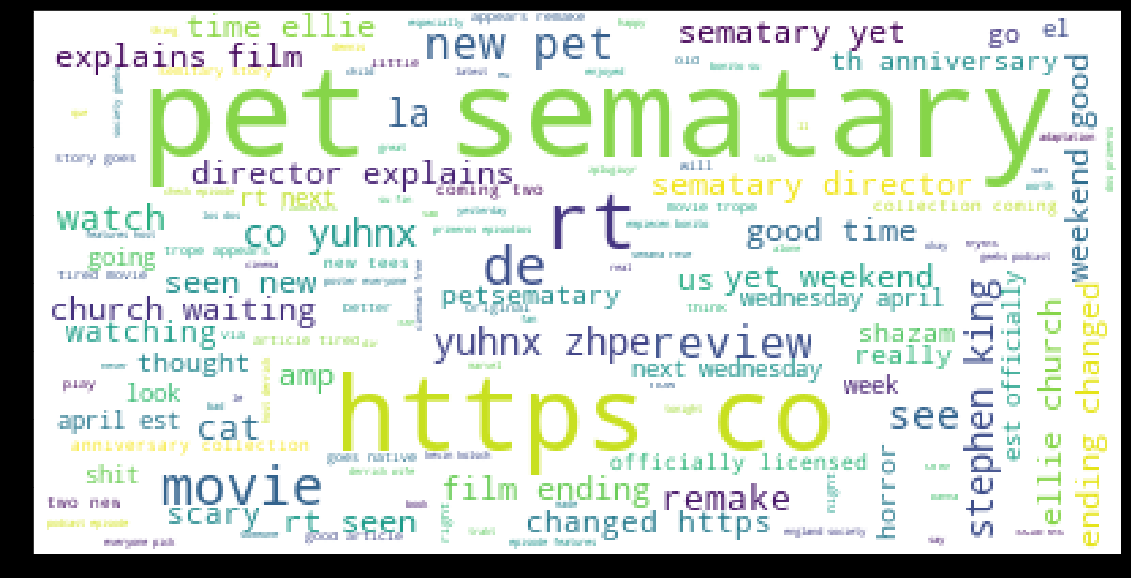

In [141]:
wordcloud(df_,'processed_text')

## Get the devices tweet the most

In [142]:
def clean_source(source):
    for i in range(len(source)):
        if (source[i]=='>') & (i!=-1):
            #print(i)
            new_source = source[i+1:-4]
            return new_source

df_['source'][0]

'<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>'

In [143]:
df_['source'][0][2:-4]

' href="http://twitter.com/download/android" rel="nofollow">Twitter for Android'

In [145]:
df_['new_source'] = df_['source'].apply(clean_source)

In [146]:
df_['new_source'][1]

'Twitter Web Client'

In [147]:
df_.head()

,text,source,id,location,time_zone,processed_text,new_source
0,"Pet Sematary was better than expected, plenty ...","<a href=""http://twitter.com/download/android"" ...",3621727455,England,None,pet sematary was better than expected plenty o...,Twitter for Android
1,Going to see the new Pet Sematary tonight. Deb...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",100679011,None,None,going to see the new pet sematary tonight deba...,Twitter Web Client
2,RT @YaOnlyLivvOnce: Pet Sematary 👀👀👀,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1015022058722545664,Estados Unidos,None,rt pet sematary,Twitter Web App
3,who seen pet sematary?,"<a href=""http://twitter.com/download/iphone"" r...",4848084281,trap house,None,who seen pet sematary,Twitter for iPhone
4,RT @starryguys: Have you seen the new PET SEMA...,"<a href=""http://twitter.com/download/android"" ...",2365351658,"Mumbai, India",None,rt have you seen the new pet sematary yet if n...,Twitter for Android


In [148]:
df_['new_source'].unique()

array(['Twitter for Android', 'Twitter Web Client', 'Twitter Web App',
       'Twitter for iPhone', 'Bloglovin', 'Twirssi', 'WordPress.com',
       'Crowdfire App', 'Born To Run Bot', 'Google', 'Facebook',
       'Trakt.tv', 'Foursquare', 'Flixano Movie Show', 'IFTTT', 'dlvr.it',
       'TweetDeck', 'Tumblr', 'Buffer', 'Movie Draft Spreadsheet',
       'Twitter for iPad', 'drumup.io'], dtype=object)

In [ ]:
#def new_source_(source):
#    if source not in ['Twitter Web Client', 'Twitter for iPhone','Twitter for Android', 'Instagram']:
#        source = "Others"
#    else:
#        source = source
#        return source

#df['new_source_']=df['new_source'].apply(new_source_)

### Histagram of number of users by defferent devices

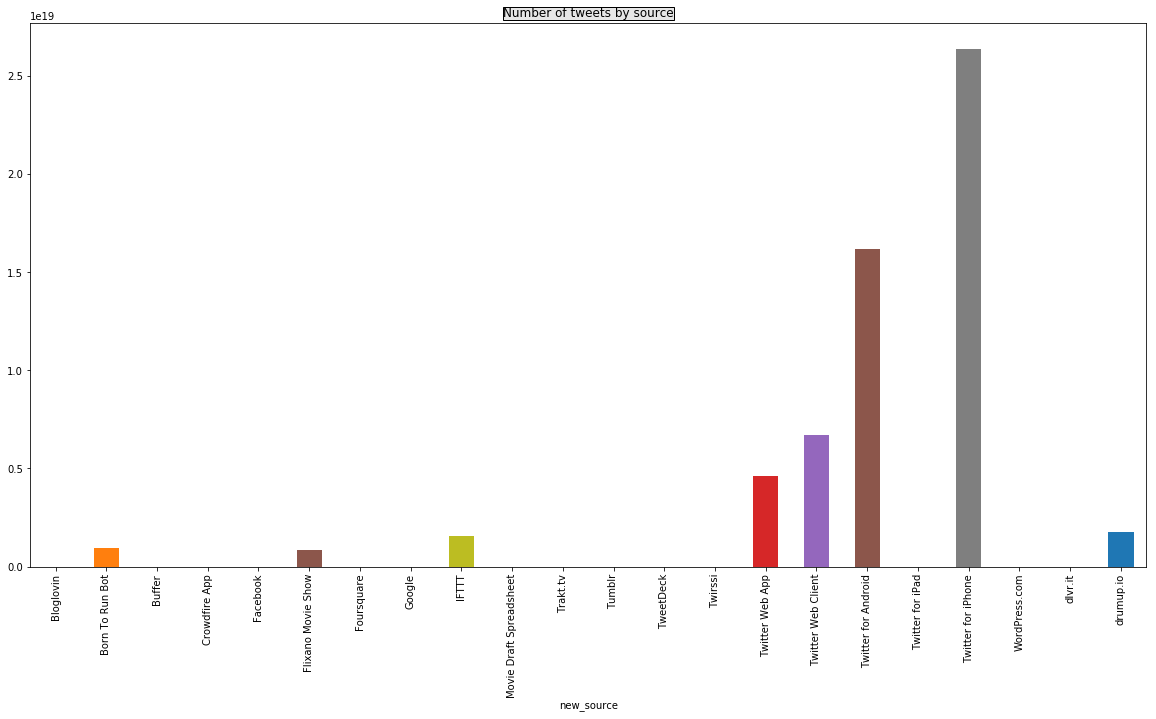

In [149]:
tweet_by_type = df_.groupby(['new_source'])['id'].sum()
plt.title('Number of tweets by source',bbox={'facecolor':'0.9','pad':0})
tweet_by_type.transpose().plot(kind='bar',figsize=(20,10))

In [98]:
tweet_by_type.head()

new_source
Bloglovin          1.451646e+07
Born To Run Bot    9.367442e+17
Buffer             1.266304e+07
Crowdfire App      2.078798e+07
Facebook           2.372336e+09
Name: id, dtype: float64

### Bar chart of number of users by different devices

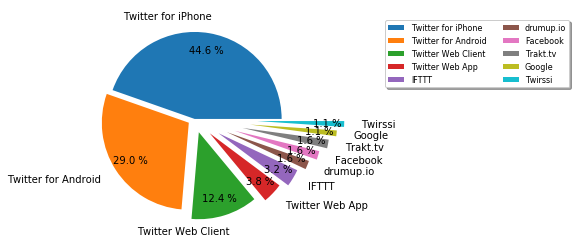

In [116]:
source_data = df_.new_source.value_counts()[:10]  # 设置原始数据
labels = list(source_data.keys())  # 设置标签
fracs = [x for x in source_data.values]
explode = [x*0.08 for x in range(len(source_data))]  # 与labels一一对应，数值越大离中心区越远
plt.axes(aspect=1)  # 设置X轴 Y轴比例

# labeldistance标签离中心距离  pctdistance百分百数据离中心区距离 autopct 百分比的格式 shadow阴影
plt.pie(x=fracs, labels=labels, explode=explode, autopct='%3.1f %%',
        shadow=False, labeldistance=1.2, startangle=0, pctdistance=0.8, center=(-1, 0))  

# 控制位置：bbox_to_anchor数组中，前者控制左右移动，后者控制上下。ncol控制 图例所列的列数。默认值为1。
plt.legend(loc=10, bbox_to_anchor=(1.8, 0.80), ncol=2, fancybox=True, shadow=True, fontsize=8)  
plt.show()

## Get the state which tweet most

In [99]:
df_.groupby('location').agg({'id':np.size}).sort_values('id',ascending=False)[:10]

,id
location,
"Massachusetts, USA",5
"Los Angeles, CA",4
Canada,3
"Las Vegas, NV",3
"Manchester, England",2
"England, United Kingdom",2
England,2
"El Paso, TX",2
South Trinidad,2


In [100]:
def get_state(location):
    if location != None:
        if ',' in location:
            return location.split(',')[1]
        else:
            return location
    else:
        return None

df_['state'] = df_['location'].apply(get_state)

df_.head()

df_.groupby('state').agg({'id':np.size}).sort_values('id',ascending=False)[:10]

,id
state,
USA,14
CA,10
TX,6
England,6
NY,4
NV,3
UK,3
United Kingdom,3
Canada,3


In [483]:
#def get_tweet_sentiment(text): 
#        ''' 
#        Utility function to classify sentiment of passed tweet 
#        using textblob's sentiment method 
#        '''
#        # create TextBlob object of passed tweet text 
#        analysis = TextBlob(text) 
#        # set sentiment 
#        if analysis.sentiment.polarity > 0: 
#            return 'positive'
#        elif analysis.sentiment.polarity == 0: 
#            return 'neutral'
#        else: 
#            return 'negative'

#def get_tweet_polarity_score(tweet): 
#        ''' 
#        Utility function to classify sentiment of passed tweet 
#        using textblob's sentiment method 
#        '''
#        # create TextBlob object of passed tweet text 
#        analysis = TextBlob(tweet) 
#        polarity = analysis.sentiment.polarity
#        return polarity

#df['sentiment']=df['processed_text'].apply(get_tweet_sentiment)

#df['polarity'] = df['processed_text'].apply(get_tweet_polarity_score)

#ptweets = df[df.sentiment=='positive']
#netweets = df[df.sentiment=='neutral']
#ntweets = df[df.sentiment=='negative']
#
#print('Positibe tweets percentage: {} %'.format(100*len(ptweets)/len(df.polarity)))
#
#print('Negative tweets percentage: {} %'.format(100*len(ntweets)/len(df.polarity)))
#
#num_bins = 50
#plt.figure(figsize=(10,6))
#n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha = 0.5)
#plt.xlabel('polarity')
#plt.ylabel('count')
#plt.title('Histogram of polarity')
#plt.show()

# Sentiment analysis

## Distinguish two kinds of tweets

In [150]:
df_.head()

,text,source,id,location,time_zone,processed_text,new_source
0,"Pet Sematary was better than expected, plenty ...","<a href=""http://twitter.com/download/android"" ...",3621727455,England,None,pet sematary was better than expected plenty o...,Twitter for Android
1,Going to see the new Pet Sematary tonight. Deb...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",100679011,None,None,going to see the new pet sematary tonight deba...,Twitter Web Client
2,RT @YaOnlyLivvOnce: Pet Sematary 👀👀👀,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1015022058722545664,Estados Unidos,None,rt pet sematary,Twitter Web App
3,who seen pet sematary?,"<a href=""http://twitter.com/download/iphone"" r...",4848084281,trap house,None,who seen pet sematary,Twitter for iPhone
4,RT @starryguys: Have you seen the new PET SEMA...,"<a href=""http://twitter.com/download/android"" ...",2365351658,"Mumbai, India",None,rt have you seen the new pet sematary yet if n...,Twitter for Android


In [165]:
df_['sentiment']= clf3.predict(df_['processed_text'])

In [166]:
df_.head()

,text,source,id,location,time_zone,processed_text,new_source,sentiment
0,"Pet Sematary was better than expected, plenty ...","<a href=""http://twitter.com/download/android"" ...",3621727455,England,None,pet sematary was better than expected plenty o...,Twitter for Android,0
1,Going to see the new Pet Sematary tonight. Deb...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",100679011,None,None,going to see the new pet sematary tonight deba...,Twitter Web Client,0
2,RT @YaOnlyLivvOnce: Pet Sematary 👀👀👀,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1015022058722545664,Estados Unidos,None,rt pet sematary,Twitter Web App,0
3,who seen pet sematary?,"<a href=""http://twitter.com/download/iphone"" r...",4848084281,trap house,None,who seen pet sematary,Twitter for iPhone,0
4,RT @starryguys: Have you seen the new PET SEMA...,"<a href=""http://twitter.com/download/android"" ...",2365351658,"Mumbai, India",None,rt have you seen the new pet sematary yet if n...,Twitter for Android,1


## The sentiment structure of Pet Sematary tweets

In [173]:
print('Positive tweets percentage: {}%'.format(len(df_[df_['sentiment']==1])/len(df_['sentiment'])*100))

Positive tweets percentage: 13.0%


In [174]:
print('Negative tweets percentage: {}%'.format(len(df_[df_['sentiment']==0])/len(df_['sentiment'])*100))

Negative tweets percentage: 87.0%


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27e70860>]],
      dtype=object)

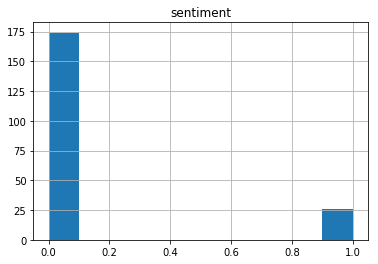

In [175]:
df_[['sentiment']].hist()